In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


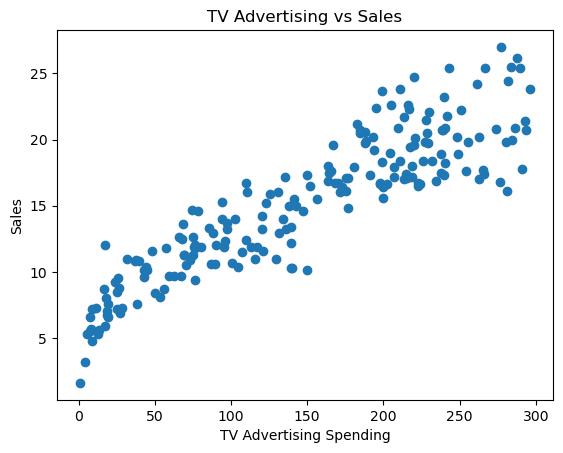

In [5]:
plt.scatter(df['TV'], df['Sales'])
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.show()

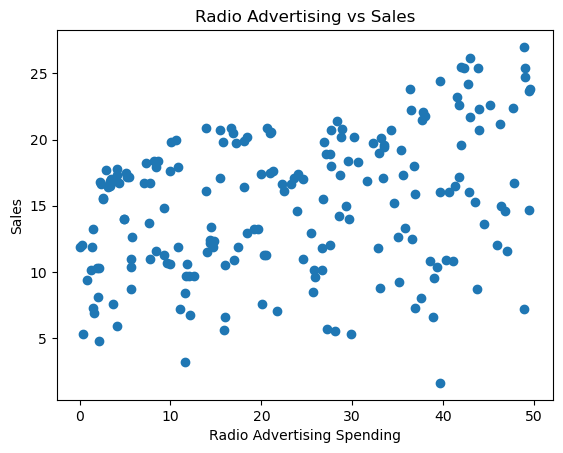

In [6]:
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising Spending')
plt.ylabel('Sales')
plt.show()

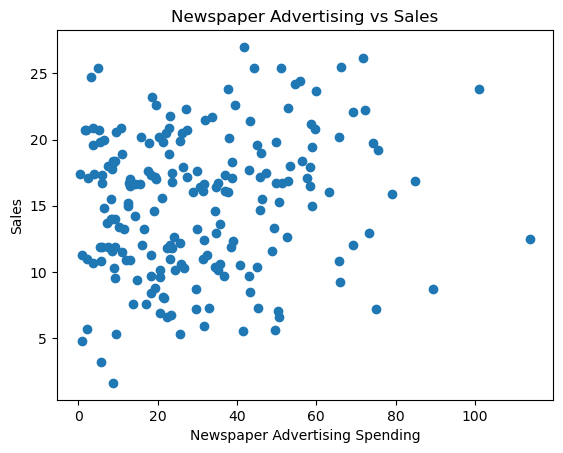

In [7]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising Spending')
plt.ylabel('Sales')
plt.show()

In [8]:
data = pd.DataFrame({
    'TV': [230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6],
    'Newspaper': [69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8],
    'Sales': [22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4]
})

In [9]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_test

3     16.5
14    19.0
1     10.4
2     12.0
Name: Sales, dtype: float64

In [15]:
y_pred

array([17.16092651, 19.71365992, 10.56622905,  9.58072675])

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7066623717736118


In [18]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8556962535096032


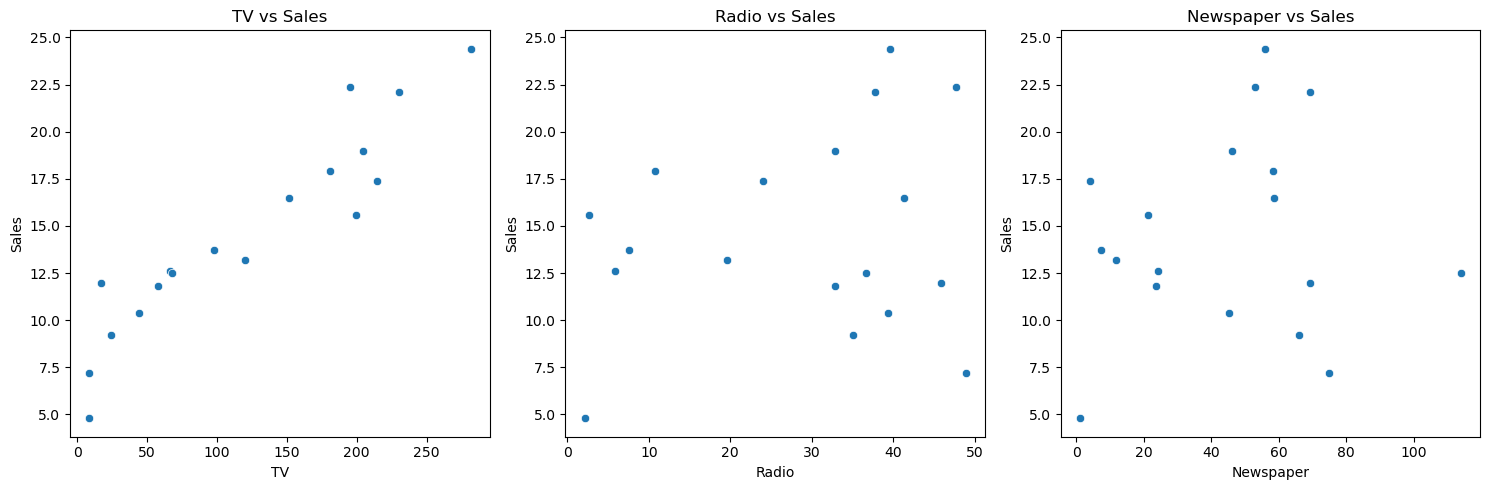

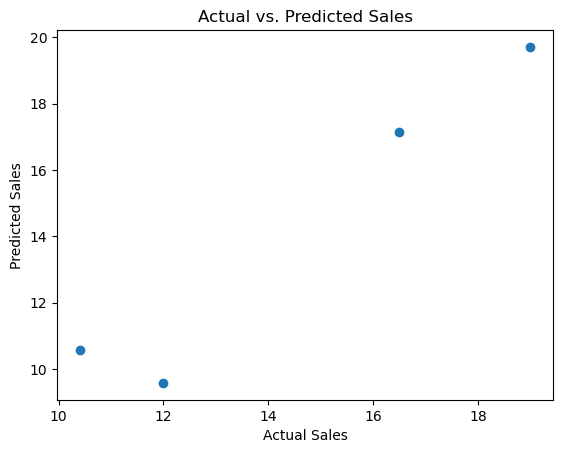

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(x='TV', y='Sales', data=data, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(x='Radio', y='Sales', data=data, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(x='Newspaper', y='Sales', data=data, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()